In [1]:
#Import necessary modules

import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import Conv2D, Input , BatchNormalization, Activation, MaxPooling2D, Dropout, Dense, Flatten


In [4]:
#load model architecture

from tensorflow.keras.models import model_from_json

with open('model_arch.json','r') as f:
    model=model_from_json(f.read())

FileNotFoundError: [Errno 2] No such file or directory: 'model_arch.json'

In [5]:
#load weights to the model

model.load_weights('model.weights.h5')

NameError: name 'model' is not defined

In [ ]:
#load and preprocess test image

img_path= 'happy.jpeg'
img = image.load_img(img_path, color_mode='grayscale', target_size=(48,48))
img_tensor= image.img_to_array(img)
img_tensor=np.expand_dims(img_tensor, axis=0)
img_tensor /=255

In [ ]:
#extract conv2D layers

layer_outputs= [layer.output for layer in model.layers if isinstance(layer, Conv2D)]
activation_model= Model(inputs= model.inputs, outputs= layer_outputs)
activations= activation_model.predict(img_tensor)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 430ms/step


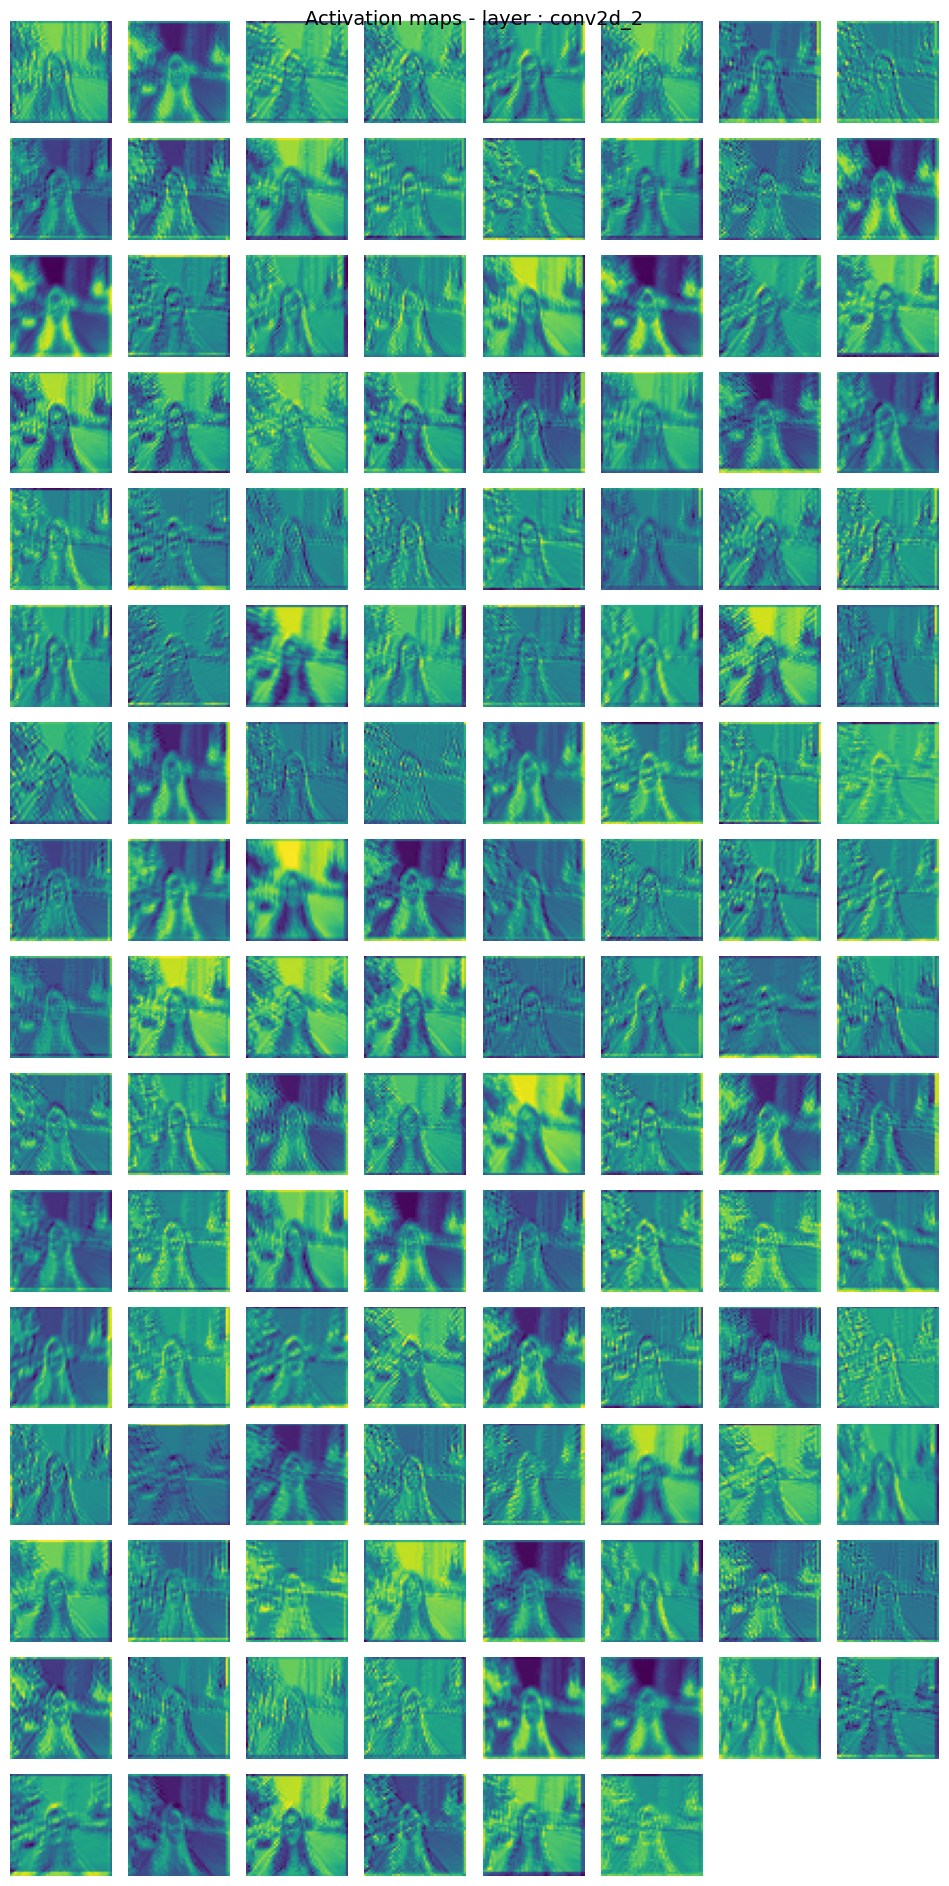

In [ ]:
#plot activation maps

for layer_name, layer_activation in zip([layer.name for layer in model.layers if isinstance(layer, Conv2D)], activations):

    # Ensure shape is (1, H, W, C)

    if len(layer_activation.shape) == 3:
        layer_activation = np.expand_dims(layer_activation, axis=0)
        
    n_features= layer_activation.shape[-1]
    size= layer_activation.shape[1]
    n_cols = 8
    n_rows = n_features // n_cols + (n_features % n_cols != 0)

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols*1.2,n_rows*1.2))
    fig.suptitle(f'Activation maps - layer : {layer_name}', fontsize=14)

    for i in range(n_rows*n_cols):
        ax= axes[i // n_cols, i % n_cols]
        if i < n_features:
            activation_map = layer_activation[0,:,:,i]
            ax.imshow(activation_map, cmap='viridis')
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()

In [ ]:
plt.savefig(f"activation_{layer_name}.png")